In [2]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression

# Splitting data into training/testing
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

In [3]:
file_path = 'KM6312_output.xlsx'  # 替换成你的Excel文件路径
df = pd.read_excel(file_path)

# 查看数据框的前几行
print(df.head())
print(df.shape)

   year Country Name  happiness_score  gdp_per_capita  social_support  \
0  2015      Albania            4.959       -0.129346       -1.238150   
1  2016      Albania            4.655       -0.045730       -2.314519   
2  2017      Albania            4.644       -0.003815       -1.240478   
3  2018      Albania            4.586       -0.087739       -1.193134   
4  2019      Albania            4.719       -0.054456       -1.082905   

   healthy_life_expectancy  freedom_to_make_life_choices  generosity  \
0                 0.712752                     -0.777314    0.233315   
1                 0.639851                     -1.033884    0.275296   
2                 0.640806                     -0.616957    0.329102   
3                 0.692375                     -0.368140    0.243582   
4                 0.765995                     -0.606996    0.290990   

   perceptions_of_corruption  PDI  ...  region_East Asia  \
0                  -0.640893  0.9  ...                 0   
1       

In [4]:
df.head(2).append(df.tail(2))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_36644\1191156126.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.head(2).append(df.tail(2))


,year,Country Name,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,PDI,...,region_East Asia,region_Latin America and Caribbean,region_Middle East and North Africa,region_North America and ANZ,region_South Asia,region_Southeast Asia,region_Sub-Saharan Africa,region_Western Europe,developing_or_developed _developed,developing_or_developed _developing
0,2015,Albania,4.959,-0.129346,-1.238150,0.712752,-0.777314,0.233315,-0.640893,0.9,...,0,0,0,0,0,0,0,0,0,1
1,2016,Albania,4.655,-0.045730,-2.314519,0.639851,-1.033884,0.275296,-0.727757,0.9,...,0,0,0,0,0,0,0,0,0,1
801,2022,Zambia,3.760,-0.072571,-2.046520,0.268186,0.335157,0.331860,-0.493488,0.6,...,0,0,0,0,0,0,1,0,0,1
802,2023,Zambia,3.982,-0.089925,-0.933562,0.083260,0.467855,0.308973,-0.516923,0.6,...,0,0,0,0,0,0,1,0,0,1


In [5]:
# 删除最后一列
df = df.iloc[:, :-1]

# 将倒数第二列重命名为 is_it_developed
df.rename(columns={df.columns[-1]: 'is_it_developed'}, inplace=True)

# 查看修改后的数据框
df.head(2).append(df.tail(2))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_36644\1287582809.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.head(2).append(df.tail(2))


,year,Country Name,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,PDI,...,region_Commonwealth of Independent States,region_East Asia,region_Latin America and Caribbean,region_Middle East and North Africa,region_North America and ANZ,region_South Asia,region_Southeast Asia,region_Sub-Saharan Africa,region_Western Europe,is_it_developed
0,2015,Albania,4.959,-0.129346,-1.238150,0.712752,-0.777314,0.233315,-0.640893,0.9,...,0,0,0,0,0,0,0,0,0,0
1,2016,Albania,4.655,-0.045730,-2.314519,0.639851,-1.033884,0.275296,-0.727757,0.9,...,0,0,0,0,0,0,0,0,0,0
801,2022,Zambia,3.760,-0.072571,-2.046520,0.268186,0.335157,0.331860,-0.493488,0.6,...,0,0,0,0,0,0,0,1,0,0
802,2023,Zambia,3.982,-0.089925,-0.933562,0.083260,0.467855,0.308973,-0.516923,0.6,...,0,0,0,0,0,0,0,1,0,0


In [6]:
# 提取特征变量（除了 "year"、"Country Name"、"happiness_score" 和 "is_it_developed"）
features = df.drop(["year", "Country Name", "happiness_score", "is_it_developed"], axis=1)

# 提取目标变量 "happiness_score"
target_happiness_score = df["happiness_score"]

# 提取目标变量 "is_it_developed"
target_is_developed = df["is_it_developed"]

# 查看特征变量和目标变量

features.head(2).append(features.tail(2))


C:\Users\ASUS\AppData\Local\Temp\ipykernel_36644\3364812017.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features.head(2).append(features.tail(2))


,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,PDI,IDV,MAS,UAI,...,region_Central and Eastern Europe,region_Commonwealth of Independent States,region_East Asia,region_Latin America and Caribbean,region_Middle East and North Africa,region_North America and ANZ,region_South Asia,region_Southeast Asia,region_Sub-Saharan Africa,region_Western Europe
0,-0.129346,-1.238150,0.712752,-0.777314,0.233315,-0.640893,0.9,0.20,0.8,0.7,...,1,0,0,0,0,0,0,0,0,0
1,-0.045730,-2.314519,0.639851,-1.033884,0.275296,-0.727757,0.9,0.20,0.8,0.7,...,1,0,0,0,0,0,0,0,0,0
801,-0.072571,-2.046520,0.268186,0.335157,0.331860,-0.493488,0.6,0.35,0.4,0.5,...,0,0,0,0,0,0,0,0,1,0
802,-0.089925,-0.933562,0.083260,0.467855,0.308973,-0.516923,0.6,0.35,0.4,0.5,...,0,0,0,0,0,0,0,0,1,0


In [7]:
# 计算特征变量与 happiness_score 的相关性
correlation_happiness_score = features.corrwith(target_happiness_score)

# 计算特征变量与 is_it_developed 的相关性
correlation_is_developed = features.corrwith(target_is_developed)

# 创建包含相关性结果的数据框
correlation_df = pd.DataFrame({
    'Correlation with Happiness Score': correlation_happiness_score,
    'Correlation with Is Developed': correlation_is_developed
})

# 打印相关性结果
print(correlation_df)

                                           Correlation with Happiness Score  \
gdp_per_capita                                                     0.618075   
social_support                                                     0.571205   
healthy_life_expectancy                                            0.538246   
freedom_to_make_life_choices                                       0.543389   
generosity                                                         0.270275   
perceptions_of_corruption                                          0.568658   
PDI                                                               -0.609679   
IDV                                                                0.637603   
MAS                                                               -0.067297   
UAI                                                               -0.125552   
LTO                                                                0.178518   
Indulgence                                          

In [8]:
features.columns

Index(['gdp_per_capita', 'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'PDI', 'IDV', 'MAS', 'UAI', 'LTO',
       'Indulgence', 'region_Central and Eastern Europe',
       'region_Commonwealth of Independent States', 'region_East Asia',
       'region_Latin America and Caribbean',
       'region_Middle East and North Africa', 'region_North America and ANZ',
       'region_South Asia', 'region_Southeast Asia',
       'region_Sub-Saharan Africa', 'region_Western Europe'],
      dtype='object')

In [9]:
# 75% is for training and 25% is for testing
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(features, target_happiness_score, target_is_developed,
                                                                         test_size=0.25, random_state=123)

In [10]:
X_train.head()

,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,PDI,IDV,MAS,UAI,...,region_Central and Eastern Europe,region_Commonwealth of Independent States,region_East Asia,region_Latin America and Caribbean,region_Middle East and North Africa,region_North America and ANZ,region_South Asia,region_Southeast Asia,region_Sub-Saharan Africa,region_Western Europe
697,0.283275,0.729691,0.769884,-0.166411,0.246195,-0.114499,0.58,0.40,0.45,0.69,...,0,0,1,0,0,0,0,0,0,0
252,0.283614,0.522067,0.781648,0.930771,0.461236,0.564433,0.35,0.67,0.66,0.65,...,0,0,0,0,0,0,0,0,0,1
427,0.429622,0.835538,0.864542,0.900032,0.320341,1.725322,0.40,0.60,0.50,0.70,...,0,0,0,0,0,0,0,0,0,1
748,0.441476,-1.040235,0.520596,1.297215,0.385807,0.600132,0.74,0.36,0.52,0.66,...,0,0,0,0,1,0,0,0,0,0
346,0.404798,1.423918,0.875548,0.275443,0.487163,1.279739,0.28,0.70,0.68,0.35,...,0,0,0,0,0,0,0,0,0,1


## LR

In [11]:
missing_values = X_train.isnull().sum()

# 显示缺失值统计
print(missing_values)

gdp_per_capita                               0
social_support                               0
healthy_life_expectancy                      0
freedom_to_make_life_choices                 0
generosity                                   0
perceptions_of_corruption                    0
PDI                                          0
IDV                                          0
MAS                                          0
UAI                                          0
LTO                                          0
Indulgence                                   0
region_Central and Eastern Europe            0
region_Commonwealth of Independent States    0
region_East Asia                             0
region_Latin America and Caribbean           0
region_Middle East and North Africa          0
region_North America and ANZ                 0
region_South Asia                            0
region_Southeast Asia                        0
region_Sub-Saharan Africa                    0
region_Wester

In [24]:
lr = LinearRegression()
lr.fit(X_train, y1_train)

LinearRegression()

In [25]:
predictions = lr.predict(X_test)
mae = np.mean(abs(predictions - y1_test))
rmse = np.sqrt(np.mean((predictions - y1_test) ** 2))
print('Using Linear Regression, MAE is %0.3f' %  mae)  
print('Using Linear Regression, RMSE is %0.3f' %  rmse)    

Using Linear Regression, MAE is 0.350
Using Linear Regression, RMSE is 0.436


In [28]:
intercept = lr.intercept_
coefficients = lr.coef_

# 获取特征名称
feature_names = X_train.columns  # 假设你的特征矩阵是一个 Pandas 数据框

# 计算每个特征的标准差
scaled_std = X_train.std()

# 最大值和最小值的差的一半
feature_range = X_train.max() - X_train.min()
scaled_std_adjusted = feature_range

# 创建系数对应的数据框
coefficients_df = pd.DataFrame({
    'Feature': ['Intercept'] + list(feature_names),
    'Coefficient': [intercept] + list(coefficients),
    'Feature_Scaled_Std': [np.nan] + list(scaled_std_adjusted),  # 第一行表示截距项，标准差为 NaN
    'Coefficient/Scaled_Std': [np.nan] + list(coefficients / scaled_std_adjusted)
})

# 打印系数表格
coefficients_df

,Feature,Coefficient,Feature_Scaled_Std,Coefficient/Scaled_Std
0,Intercept,4.618579,NaN,NaN
1,gdp_per_capita,0.335630,3.261756,0.102898
2,social_support,0.137580,5.161247,0.026656
3,healthy_life_expectancy,0.691166,1.000000,0.691166
4,freedom_to_make_life_choices,0.216473,5.122130,0.042262
5,generosity,0.279670,1.000000,0.279670
6,perceptions_of_corruption,0.106985,4.585393,0.023332
7,PDI,-0.115528,0.890000,-0.129807
8,IDV,0.524348,0.900000,0.582609
9,MAS,-0.183132,0.950000,-0.192771


In [202]:
target_happiness_score.max() - target_happiness_score.min()

5.449999999999999

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

C:\Users\ASUS\AppData\Local\Temp\ipykernel_36644\487962465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coefficients_df['Feature'] = coefficients_df.apply(lambda row: row['Feature'] + ('+' if row['Coefficient/Scaled_Std'] > 0 else '-'), axis=1)


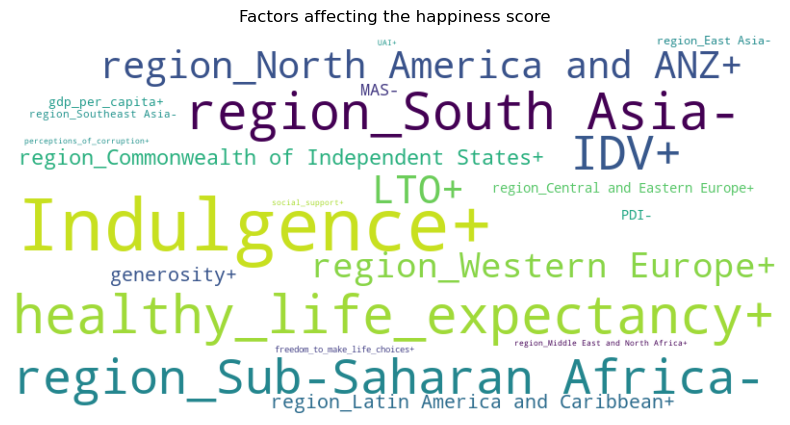

In [29]:
coefficients_df = coefficients_df.iloc[1:]

# 添加符号到特征名称
coefficients_df['Feature'] = coefficients_df.apply(lambda row: row['Feature'] + ('+' if row['Coefficient/Scaled_Std'] > 0 else '-'), axis=1)

# 生成带符号的特征和权重的字典
wordcloud_data_signed = {feature: abs(weight) for feature, weight in zip(coefficients_df['Feature'], coefficients_df['Coefficient/Scaled_Std'])}

# 生成词云
wordcloud_signed = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_data_signed)

# 绘制词云图
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_signed, interpolation='bilinear')
plt.axis('off')
plt.title('Factors affecting the happiness score')
plt.show()

## lasso

In [58]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# 创建 Lasso 回归模型
lasso = Lasso()

# 定义超参数搜索范围
param_grid = {
    'alpha': [0.01, 0.05, 0.1]  # 正则化参数
}

# 使用网格搜索进行超参数调优
grid_search = GridSearchCV(lasso, param_grid, cv=5)
grid_search.fit(X_train, y1_train)

# 输出最佳超参数
best_alpha_lasso = grid_search.best_params_['alpha']

# 使用最佳超参数创建最终的 Lasso 回归模型
final_lasso = Lasso(alpha=best_alpha_lasso)
final_lasso.fit(X_train, y1_train)

Lasso(alpha=0.01)

In [195]:
y_pred_lasso = final_lasso.predict(X_test)
mae = np.mean(abs(y_pred_lasso - y1_test))
rmse = np.sqrt(np.mean((y_pred_lasso - y1_test) ** 2))
print('Using Lasso, MAE is %0.3f' %  mae)  
print('Using Lasso, RMSE is %0.3f' %  rmse)    

Using Lasso, MAE is 0.374
Using Lasso, RMSE is 0.453


## decision tree

In [61]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# 创建决策树回归模型
decision_tree = DecisionTreeRegressor()

# 在训练集上拟合模型
decision_tree.fit(X_train, y1_train)

DecisionTreeRegressor()

In [194]:
y_pred_decision_tree = decision_tree.predict(X_test)
mae = np.mean(abs(y_pred_decision_tree - y1_test))
rmse = np.sqrt(np.mean((y_pred_decision_tree - y1_test) ** 2))
print('Using DecisionTreeRegressor, MAE is %0.3f' %  mae)  
print('Using DecisionTreeRegressor, RMSE is %0.3f' %  rmse)   

Using DecisionTreeRegressor, MAE is 0.241
Using DecisionTreeRegressor, RMSE is 0.371


## random forest

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 创建随机森林回归模型
random_forest = RandomForestRegressor()

# 在训练集上拟合模型
random_forest.fit(X_train, y1_train)

RandomForestRegressor()

In [193]:
y_pred_random_forest = random_forest.predict(X_test)
mae = np.mean(abs(y_pred_random_forest - y1_test))
rmse = np.sqrt(np.mean((y_pred_random_forest - y1_test) ** 2))
print('Using RandomForestRegressor, MAE is %0.3f' %  mae)  
print('Using RandomForestRegressor, RMSE is %0.3f' %  rmse)   

Using RandomForestRegressor, MAE is 0.176
Using RandomForestRegressor, RMSE is 0.267


## SVR

In [67]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# 数据标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 创建支持向量回归模型
svr = SVR()

# 在训练集上拟合模型
svr.fit(X_train_scaled, y1_train)

SVR()

In [192]:
y_pred_svr = svr.predict(X_test_scaled)
mae = np.mean(abs(y_pred_svr - y1_test))
rmse = np.sqrt(np.mean((y_pred_svr - y1_test) ** 2))
print('Using SVR, MAE is %0.3f' %  mae)  
print('Using SVR, RMSE is %0.3f' %  rmse)   

Using SVR, MAE is 0.217
Using SVR, RMSE is 0.291


## K-nearest

In [84]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# 数据标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 创建K最近邻回归模型
knn_reg = KNeighborsRegressor(n_neighbors=3)  # 可以调整邻居的数量

# 在训练集上拟合模型
knn_reg.fit(X_train_scaled, y1_train)

KNeighborsRegressor(n_neighbors=3)

In [191]:
y_pred_knn = knn_reg.predict(X_test_scaled)
mae = np.mean(abs(y_pred_knn - y1_test))
rmse = np.sqrt(np.mean((y_pred_knn - y1_test) ** 2))
print('Using KNeighborsRegressor, MAE is %0.3f' %  mae)  
print('Using KNeighborsRegressor, RMSE is %0.3f' %  rmse)  

Using KNeighborsRegressor, MAE is 0.179
Using KNeighborsRegressor, RMSE is 0.253


## neuron network

In [170]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# 数据标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 创建神经网络模型
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(64, activation='tanh')) 
model.add(Dense(32, activation='sigmoid')) 
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # 线性激活函数用于回归任务

# 编译模型
model.compile(optimizer='adam', loss='mean_squared_error')

# 在训练集上拟合模型
model.fit(X_train_scaled, y1_train, epochs=80, batch_size=32, validation_split=0.25)



Epoch 1/80
15/15 [==============================] - 1s 9ms/step - loss: 29.7231 - val_loss: 23.4095
Epoch 2/80
15/15 [==============================] - 0s 3ms/step - loss: 19.1500 - val_loss: 12.9060
Epoch 3/80
15/15 [==============================] - 0s 3ms/step - loss: 9.2292 - val_loss: 4.6583
Epoch 4/80
15/15 [==============================] - 0s 2ms/step - loss: 2.9046 - val_loss: 1.1805
Epoch 5/80
15/15 [==============================] - 0s 2ms/step - loss: 0.9494 - val_loss: 0.7483
Epoch 6/80
15/15 [==============================] - 0s 2ms/step - loss: 0.8174 - val_loss: 0.7207
Epoch 7/80
15/15 [==============================] - 0s 2ms/step - loss: 0.7242 - val_loss: 0.5767
Epoch 8/80
15/15 [==============================] - 0s 2ms/step - loss: 0.6021 - val_loss: 0.4934
Epoch 9/80
15/15 [==============================] - 0s 2ms/step - loss: 0.5081 - val_loss: 0.4162
Epoch 10/80
15/15 [==============================] - 0s 2ms/step - loss: 0.4201 - val_loss: 0.3538
Epoch 11/80
15/

In [190]:
y_pred_nn = model.predict(X_test_scaled)
y_pred_nn = y_pred_nn.flatten()  # 或者使用 y_pred_nn.ravel()

mae = np.mean(abs(y_pred_nn - y1_test))
rmse = np.sqrt(np.mean((y_pred_nn - y1_test) ** 2))

print('Using neural network, MAE is %0.3f' % mae)
print('Using neural network, RMSE is %0.3f' % rmse)

7/7 [==============================] - 0s 500us/step
Using neural network, MAE is 0.230
Using neural network, RMSE is 0.312


Using Linear Regression, MAE is 0.350
Using Linear Regression, RMSE is 0.436
Using Lasso, MAE is 0.374
Using Lasso, RMSE is 0.453
Using DecisionTreeRegressor, MAE is 0.241
Using DecisionTreeRegressor, RMSE is 0.371
Using RandomForestRegressor, MAE is 0.176
Using RandomForestRegressor, RMSE is 0.267
Using SVR, MAE is 0.217
Using SVR, RMSE is 0.291
Using KNeighborsRegressor, MAE is 0.179
Using KNeighborsRegressor, RMSE is 0.253
Using neural network, MAE is 0.230
Using neural network, RMSE is 0.312
In final prediction, MAE is 0.164
In final prediction, RMSE is 0.233

## Weighted Stacking

In [199]:
weights = [0.05, 0.3, 0.1, 0.5, 0.05]

# 计算加权叠加后的预测结果
final_prediction = (
    weights[0] * y_pred_decision_tree +
    weights[1] * y_pred_random_forest +
    weights[2] * y_pred_svr +
    weights[3] * y_pred_knn +
    weights[4] * y_pred_nn
)

mae = np.mean(abs(final_prediction - y1_test))
rmse = np.sqrt(np.mean((final_prediction - y1_test) ** 2))

print('In final prediction, MAE is %0.3f' % mae)
print('In final prediction, RMSE is %0.3f' % rmse)

In final prediction, MAE is 0.164
In final prediction, RMSE is 0.233


## 可视化

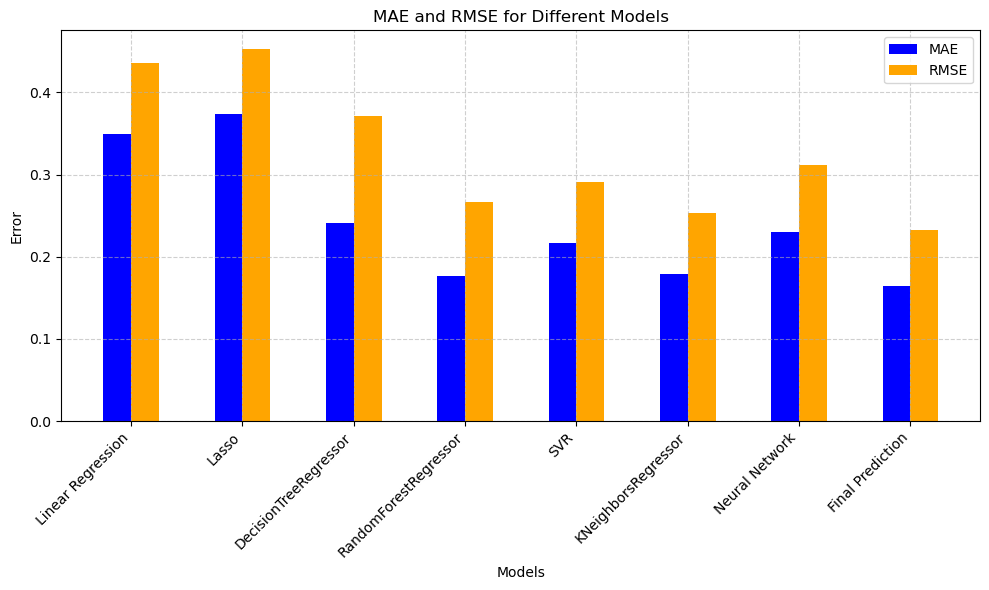

In [197]:
import matplotlib.pyplot as plt
import numpy as np

# 你提供的数据
models = ['Linear Regression', 'Lasso', 'DecisionTreeRegressor', 'RandomForestRegressor', 'SVR', 'KNeighborsRegressor', 'Neural Network', 'Final Prediction']
mae_values = [0.350, 0.374, 0.241, 0.176, 0.217, 0.179, 0.230, 0.164]
rmse_values = [0.436, 0.453, 0.371, 0.267, 0.291, 0.253, 0.312, 0.233]

# 创建一个子图
fig, ax = plt.subplots(figsize=(10, 6))

# 计算两个柱状图的宽度
bar_width = 0.25
bar_positions_mae = np.arange(len(models))
bar_positions_rmse = bar_positions_mae + bar_width

# 绘制 MAE 和 RMSE 柱状图
ax.bar(bar_positions_mae, mae_values, width=bar_width, label='MAE', color='blue')
ax.bar(bar_positions_rmse, rmse_values, width=bar_width, label='RMSE', color='orange')

# 设置刻度和标签
ax.set_xticks(bar_positions_mae + bar_width / 2)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.set_title('MAE and RMSE for Different Models')
ax.set_xlabel('Models')
ax.set_ylabel('Error')

# 添加网格线
ax.grid(True, linestyle='--', alpha=0.6)

# 显示图例
ax.legend()

# 显示图形
plt.tight_layout()
plt.show()

## Develop status

In [58]:
# 75% is for training and 25% is for testing
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(features, target_happiness_score, target_is_developed,
                                                                         test_size=0.25, random_state=123)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


# 创建 Logistic Regression 模型
logistic_model = LogisticRegression()

# 在训练集上拟合模型
logistic_model.fit(X_train, y2_train)

# 在测试集上进行预测
y_pred = logistic_model.predict(X_test)

# 评估模型性能
accuracy = accuracy_score(y2_test, y_pred)
conf_matrix = confusion_matrix(y2_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)

Accuracy: 0.9402985074626866
Confusion Matrix:
 [[111   5]
 [  7  78]]


In [30]:

intercept = logistic_model.intercept_[0]  # 取出截距值
coefficients = logistic_model.coef_[0]  # 取出系数数组

# 创建包含模型截距和系数的 DataFrame
coefficients_df = pd.DataFrame({
    'Feature': ['Intercept'] + list(X_train.columns),  # 如果你的特征有列名，可以使用 X_train.columns
    'Coefficient': [intercept] + list(coefficients),
    'Feature_Scaled_Std': [np.nan] + list(scaled_std_adjusted),  # 第一行表示截距项，标准差为 NaN
    'Coefficient/Scaled_Std': [np.nan] + list(coefficients / scaled_std_adjusted)
})

# 打印系数表格
coefficients_df

,Feature,Coefficient,Feature_Scaled_Std,Coefficient/Scaled_Std
0,Intercept,-2.532845,NaN,NaN
1,gdp_per_capita,2.712163,3.261756,0.831504
2,social_support,0.207621,5.161247,0.040227
3,healthy_life_expectancy,3.149734,1.000000,3.149734
4,freedom_to_make_life_choices,-0.130923,5.122130,-0.025560
5,generosity,0.537928,1.000000,0.537928
6,perceptions_of_corruption,0.695767,4.585393,0.151736
7,PDI,-1.905112,0.890000,-2.140575
8,IDV,2.504364,0.900000,2.782627
9,MAS,-0.322422,0.950000,-0.339392


C:\Users\ASUS\AppData\Local\Temp\ipykernel_36644\3378426413.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coefficients_df['Feature'] = coefficients_df.apply(lambda row: row['Feature'] + ('+' if row['Coefficient/Scaled_Std'] > 0 else '-'), axis=1)


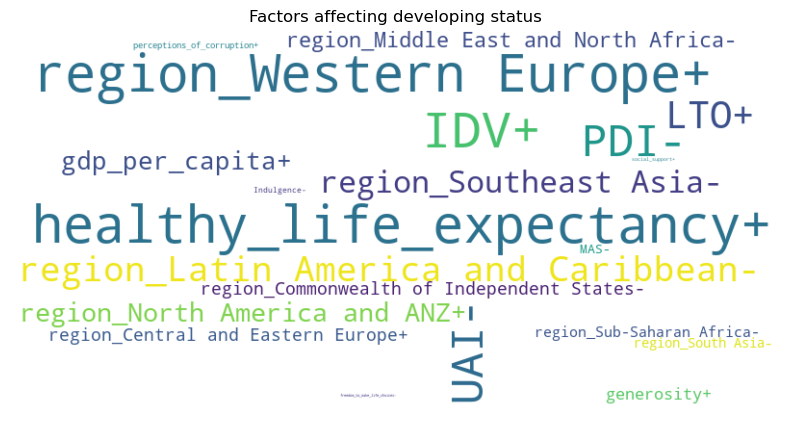

In [31]:
coefficients_df = coefficients_df.iloc[1:]

# 添加符号到特征名称
coefficients_df['Feature'] = coefficients_df.apply(lambda row: row['Feature'] + ('+' if row['Coefficient/Scaled_Std'] > 0 else '-'), axis=1)

# 生成带符号的特征和权重的字典
wordcloud_data_signed = {feature: abs(weight) for feature, weight in zip(coefficients_df['Feature'], coefficients_df['Coefficient/Scaled_Std'])}

# 生成词云
wordcloud_signed = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_data_signed)

# 绘制词云图
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_signed, interpolation='bilinear')
plt.axis('off')
plt.title('Factors affecting developing status')
plt.show()

## decision tree

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming X_train, X_test, y2_train, and y2_test are pandas DataFrames
# Convert them to NumPy arrays
X_train_np = X_train.values
X_test_np = X_test.values
y2_train_np = y2_train.values
y2_test_np = y2_test.values

# Create DecisionTreeClassifier instance
decision_tree_model = DecisionTreeClassifier(random_state=123)

# Fit the model on the training set
decision_tree_model.fit(X_train_np, y2_train_np)

# Make predictions on the test set
y_pred = decision_tree_model.predict(X_test_np)
y_pred_tree = y_pred
# Evaluate the model performance
accuracy = accuracy_score(y2_test_np, y_pred)
conf_matrix = confusion_matrix(y2_test_np, y_pred)
classification_rep = classification_report(y2_test_np, y_pred)

print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', classification_rep)

Accuracy: 0.9601990049751243
Confusion Matrix:
 [[110   6]
 [  2  83]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       116
           1       0.93      0.98      0.95        85

    accuracy                           0.96       201
   macro avg       0.96      0.96      0.96       201
weighted avg       0.96      0.96      0.96       201



## random forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 创建随机森林分类器
random_forest_model = RandomForestClassifier(random_state=123)

# 在训练集上拟合模型
random_forest_model.fit(X_train, y2_train)

# 在测试集上进行预测
y_pred = random_forest_model.predict(X_test)

# 评估模型性能
accuracy = accuracy_score(y2_test, y_pred)
conf_matrix = confusion_matrix(y2_test, y_pred)
classification_rep = classification_report(y2_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', classification_rep)

Accuracy: 1.0
Confusion Matrix:
 [[116   0]
 [  0  85]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       116
           1       1.00      1.00      1.00        85

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201



## svc

In [77]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 创建支持向量机分类器
svm_model = SVC(random_state=123)

# 在训练集上拟合模型
svm_model.fit(X_train, y2_train)

# 在测试集上进行预测
y_pred = svm_model.predict(X_test)

# 评估模型性能
accuracy = accuracy_score(y2_test, y_pred)
conf_matrix = confusion_matrix(y2_test, y_pred)
classification_rep = classification_report(y2_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', classification_rep)

Accuracy: 0.9402985074626866
Confusion Matrix:
 [[112   4]
 [  8  77]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       116
           1       0.95      0.91      0.93        85

    accuracy                           0.94       201
   macro avg       0.94      0.94      0.94       201
weighted avg       0.94      0.94      0.94       201



## KNN

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 创建 KNN 分类器，指定邻居数量（n_neighbors）
knn_model = KNeighborsClassifier(n_neighbors=2)

# 在训练集上拟合模型
knn_model.fit(X_train, y2_train)

# 在测试集上进行预测
X_testknn = np.array(X_test)
y_pred = knn_model.predict(X_testknn)
y_pred_knn = y_pred
# 评估模型性能
accuracy = accuracy_score(y2_test, y_pred)
conf_matrix = confusion_matrix(y2_test, y_pred)
classification_rep = classification_report(y2_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', classification_rep)

Accuracy: 0.945273631840796
Confusion Matrix:
 [[116   0]
 [ 11  74]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       116
           1       1.00      0.87      0.93        85

    accuracy                           0.95       201
   macro avg       0.96      0.94      0.94       201
weighted avg       0.95      0.95      0.94       201



D:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## neural network

In [80]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 数据标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 创建 MLP 分类器
mlp_model = MLPClassifier(random_state=123, max_iter=1000)

# 在训练集上拟合模型
mlp_model.fit(X_train_scaled, y2_train)

# 在测试集上进行预测
y_pred = mlp_model.predict(X_test_scaled)
y_pred_nn = y_pred
# 评估模型性能
accuracy = accuracy_score(y2_test, y_pred)
conf_matrix = confusion_matrix(y2_test, y_pred)
classification_rep = classification_report(y2_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', classification_rep)

Accuracy: 0.9900497512437811
Confusion Matrix:
 [[115   1]
 [  1  84]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       116
           1       0.99      0.99      0.99        85

    accuracy                           0.99       201
   macro avg       0.99      0.99      0.99       201
weighted avg       0.99      0.99      0.99       201



## 投票加权

In [85]:
from scipy.stats import mode

# Assuming you have y_pred_tree, y_pred_knn, and y_pred_nn as the individual predictions
# Convert the predictions to NumPy arrays
y_pred_tree_np = np.array(y_pred_tree)
y_pred_knn_np = np.array(y_pred_knn)
y_pred_nn_np = np.array(y_pred_nn)

# Stack the predictions along a new axis (axis=0)
stacked_predictions = np.stack([y_pred_tree_np, y_pred_knn_np, y_pred_nn_np], axis=0)

ensemble_predictions, _ = mode(stacked_predictions, axis=0)

# Now ensemble_predictions contains the majority voted result for each sample
ensemble_predictions = ensemble_predictions.flatten()

# Evaluate the ensemble's performance if needed
accuracy_ensemble = accuracy_score(y2_test_np, ensemble_predictions)
conf_matrix_ensemble = confusion_matrix(y2_test_np, ensemble_predictions)
classification_rep_ensemble = classification_report(y2_test_np, ensemble_predictions)

print('Ensemble Accuracy:', accuracy_ensemble)
print('Ensemble Confusion Matrix:\n', conf_matrix_ensemble)
print('Ensemble Classification Report:\n', classification_rep_ensemble)


Ensemble Accuracy: 0.9900497512437811
Ensemble Confusion Matrix:
 [[116   0]
 [  2  83]]
Ensemble Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       116
           1       1.00      0.98      0.99        85

    accuracy                           0.99       201
   macro avg       0.99      0.99      0.99       201
weighted avg       0.99      0.99      0.99       201



C:\Users\ASUS\AppData\Local\Temp\ipykernel_25260\1631171730.py:12: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ensemble_predictions, _ = mode(stacked_predictions, axis=0)


## 可视化

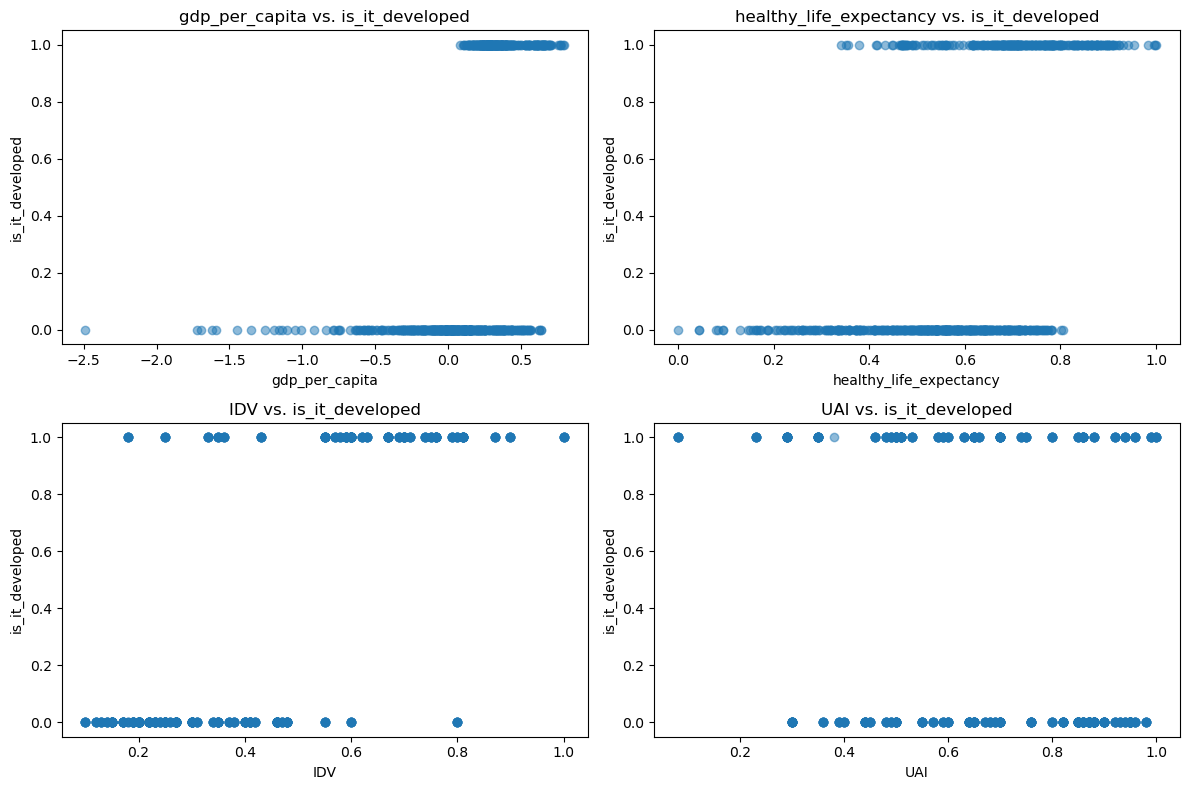

In [89]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the relevant columns
plt.figure(figsize=(12, 8))

# Scatter plot for gdp_per_capita
plt.subplot(2, 2, 1)
plt.scatter(df['gdp_per_capita'], df['is_it_developed'], alpha=0.5)
plt.title('gdp_per_capita vs. is_it_developed')
plt.xlabel('gdp_per_capita')
plt.ylabel('is_it_developed')

# Scatter plot for healthy_life_expectancy
plt.subplot(2, 2, 2)
plt.scatter(df['healthy_life_expectancy'], df['is_it_developed'], alpha=0.5)
plt.title('healthy_life_expectancy vs. is_it_developed')
plt.xlabel('healthy_life_expectancy')
plt.ylabel('is_it_developed')

# Scatter plot for IDV
plt.subplot(2, 2, 3)
plt.scatter(df['IDV'], df['is_it_developed'], alpha=0.5)
plt.title('IDV vs. is_it_developed')
plt.xlabel('IDV')
plt.ylabel('is_it_developed')

# Scatter plot for UAI
plt.subplot(2, 2, 4)
plt.scatter(df['UAI'], df['is_it_developed'], alpha=0.5)
plt.title('UAI vs. is_it_developed')
plt.xlabel('UAI')
plt.ylabel('is_it_developed')

plt.tight_layout()
plt.show()








Logistic Regression: 0.9402985074626866
Decision tree: 0.9601990049751243
Random forest: 1.0
SVC: 0.9402985074626866
KNN: 0.945273631840796
Neural Network: 0.9900497512437811

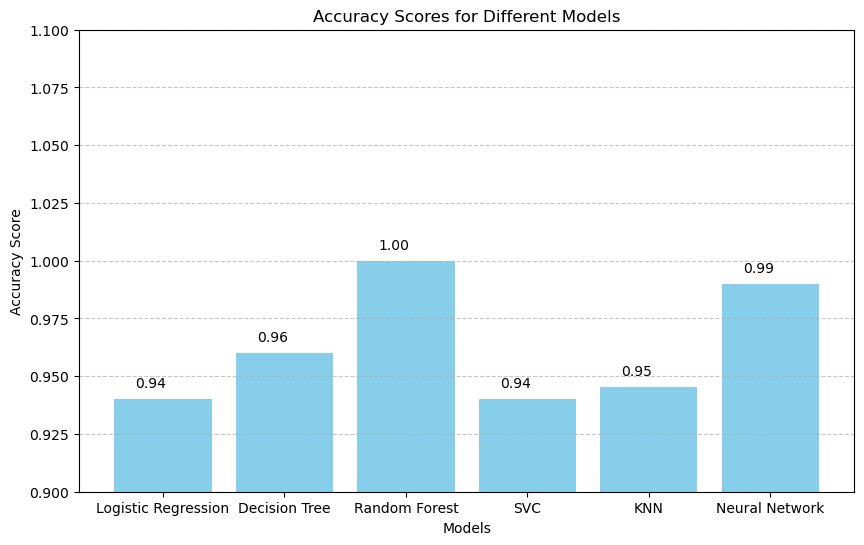

In [2]:
import matplotlib.pyplot as plt

# Data
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVC', 'KNN', 'Neural Network']
accuracy_scores = [0.9402985074626866, 0.9601990049751243, 1.0, 0.9402985074626866, 0.945273631840796, 0.9900497512437811]

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracy_scores, color='skyblue')

# Add horizontal gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add values on top of the bars
for bar, score in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.005, f'{score:.2f}', ha='center', color='black')

plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Different Models')
plt.ylim(0.9, 1.1)  # Set y-axis limit for better visualization
plt.show()